In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("HE_-_Percent_of_City_Electricity_Supplied_by_Renewable_Sources_20240127.csv")

Making it so that the date column only shows the date itself

In [3]:
data.Date = data.Date.str.replace("12:00:00 AM", "")

In [4]:
data.Date = data.Date.str.replace("12/31/", "")

In [5]:
data.Date = data.Date.astype("int32")

Because the import of the data is a little funky, a manual addition of the percent totals was required

In [6]:
percent = [0.073,0.074,0.074,0.074,0.09,0.09,0.34,0.336,0.338,0.337,0.372,0.375,0.264,0.261,0.263,0.262,0.28,0.283,0.003,0.001,0.002,0.002,0.002,0.002,0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.125,0.125]
percent_new = [i * 100 for i in percent]

In [7]:
data["Percent"] = percent_new

In [8]:
data = data.drop("Percentage Value", axis = 1)

In [9]:
data

,Date,Category,Total Value,Percent
0,2015,RPS Amount for City Ops,4614224.0,7.3
1,2016,RPS Amount for City Ops,4695708.0,7.4
2,2017,RPS Amount for City Ops,4650496.0,7.4
3,2018,RPS Amount for City Ops,4671934.0,7.4
4,2019,RPS Amount for City Ops,5332527.0,9.0
5,2020,RPS Amount for City Ops,5278795.0,9.0
6,2015,Total,21400424.0,34.0
7,2016,Total,21387061.0,33.6
8,2017,Total,21393079.0,33.8
9,2018,Total,21406918.0,33.7


The rest of the code is transforming the data into meaningful dataframes and doing a little preliminary work

In [10]:
data_total = data.pivot(index = "Date", columns = "Category", values = ["Total Value"])

In [11]:
data_total

Total Value                                               \
Category CE Green Purchasing Oak Industrial Drive RPS Amount for City Ops   
Date                                                                        
2015              16621200.0             165000.0               4614224.0   
2016              16621200.0              70153.0               4695708.0   
2017              16621200.0             121383.0               4650496.0   
2018              16621200.0             113784.0               4671934.0   
2019              16621200.0             110620.0               5332527.0   
2020              16621200.0             110067.0               5278795.0   

                                                        
Category RPS Requirement       Total Total RE Baseline  
Date                                                    
2015                 NaN  21400424.0        62928444.0  
2016                 NaN  21387061.0        63648434.0  
2017                 NaN  21393079.0        63247544.0  
2018                 NaN  21406918.0        63454321.0  
2019                 NaN  22064347.0        59392038.0  
2020                 NaN  22010062.0        58740939.0

In [12]:
data_percent = data.pivot(index = "Date", columns = "Category", values = "Percent")

In [13]:
data_percent

Category,CE Green Purchasing,Oak Industrial Drive,RPS Amount for City Ops,RPS Requirement,Total,Total RE Baseline
Date,,,,,,
2015,26.4,0.3,7.3,10.0,34.0,0.0
2016,26.1,0.1,7.4,10.0,33.6,0.0
2017,26.3,0.2,7.4,10.0,33.8,0.0
2018,26.2,0.2,7.4,10.0,33.7,0.0
2019,28.0,0.2,9.0,12.5,37.2,0.0
2020,28.3,0.2,9.0,12.5,37.5,0.0


In [14]:
data_total.describe()

Total Value                                               \
Category CE Green Purchasing Oak Industrial Drive RPS Amount for City Ops   
count                    6.0             6.000000            6.000000e+00   
mean              16621200.0        115167.833333            4.873947e+06   
std                      0.0         30321.031100            3.359054e+05   
min               16621200.0         70153.000000            4.614224e+06   
25%               16621200.0        110205.250000            4.655856e+06   
50%               16621200.0        112202.000000            4.683821e+06   
75%               16621200.0        119483.250000            5.133023e+06   
max               16621200.0        165000.000000            5.332527e+06   

                                                          
Category RPS Requirement         Total Total RE Baseline  
count                0.0  6.000000e+00      6.000000e+00  
mean                 NaN  2.161032e+07      6.190195e+07  
std                  NaN  3.311800e+05      2.218830e+06  
min                  NaN  2.138706e+07      5.874094e+07  
25%                  NaN  2.139492e+07      6.027614e+07  
50%                  NaN  2.140367e+07      6.308799e+07  
75%                  NaN  2.185928e+07      6.340263e+07  
max                  NaN  2.206435e+07      6.364843e+07

In [15]:
data_percent.describe()

Category,CE Green Purchasing,Oak Industrial Drive,RPS Amount for City Ops,RPS Requirement,Total,Total RE Baseline
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,26.883333,0.200000,7.916667,10.833333,34.966667,0.0
std,0.990791,0.063246,0.840040,1.290994,1.853285,0.0
min,26.100000,0.100000,7.300000,10.000000,33.600000,0.0
25%,26.225000,0.200000,7.400000,10.000000,33.725000,0.0
50%,26.350000,0.200000,7.400000,10.000000,33.900000,0.0
75%,27.600000,0.200000,8.600000,11.875000,36.400000,0.0
max,28.300000,0.300000,9.000000,12.500000,37.500000,0.0


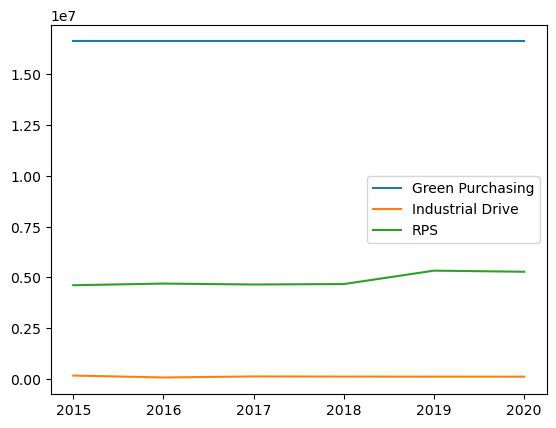

In [16]:
plt.plot(data_total["Total Value"]["CE Green Purchasing"], label = "Green Purchasing")
plt.plot(data_total["Total Value"]["Oak Industrial Drive"], label = "Industrial Drive")
plt.plot(data_total["Total Value"]["RPS Amount for City Ops"], label = "RPS")
plt.legend()
plt.show()

In [22]:
data_total.to_csv("Data_Total.csv")
data_percent.to_csv("Data_Percent.csv")